# Trabalho de Algoritmos Genéticos

Nome: Ricardo Coutinho Cordeiro

Professor: Ulisses Brisolara Corrêa


# DEAP Introdução
---
![image](https://deap.readthedocs.io/en/master/_images/deap_long.png)

* Distributed Evolutionary Algorithm in Python  is a evolutionary computation framework for rapid prototyping and testing of ideas.

* [DEAP](https://github.com/DEAP/deap) (Distributed Evolutionary Algorithm in Python) é um framework de computação evolutiva para prototipagem rápida e teste de ideias.

## Material Teórico Algoritmos Genéticos

* Youtube: [Genetic Algorithms by Example](https://www.youtube.com/watch?v=uQj5UNhCPuo)

* Medium: [Genetic Algorithms From Theory to Practice](https://medium.com/@atbender/from-theory-to-practice-designing-genetic-algorithms-to-solve-complex-optimization-problems-cbb2ae44296)

* Book: [Introduction to Genetic Algorithms -- Melanie Mitchell](https://www.boente.eti.br/fuzzy/ebook-fuzzy-mitchell.pdf)


## Instalando DEAP

In [ ]:
!pip install deap

In [ ]:
import warnings

# Estamos suprimindo um warning do DEAP que pode dificultar a visualização dos resultados
warnings.filterwarnings("ignore", category=RuntimeWarning)

## Fitness

* Para definir funções de fitness, usamos `creator.create()`.

* A função `create()` recebe três argumentos: um nome para a nova classe criada, uma classe base e o atributo de pesos.

* A classe de fitness requer um parâmetro de pesos, que descreve os objetivos.

* O atributo de pesos deve ser uma tupla para que fitness de múltiplos objetivos e de objetivo único possam ser tratadas da mesma maneira.

* Abaixo, definimos uma função de maximização de objetivo único:

* Observe que tuplas de um único elemento em Python são definidas com uma vírgula no final.

In [ ]:
from deap import base, creator

creator.create("Fitness", base.Fitness, weights=(1.0,))

* Uma fitness de minimização é construída usando pesos negativos, enquanto uma fitness de maximização tem pesos positivos.

* Podemos facilmente definir uma função de aptidão que maximize o primeiro objetivo e minimize o segundo.

In [ ]:
creator.create("FitnessMulti", base.Fitness, weights=(1.0, -1.0))

* Os pesos podem ser usados para variar a importância de cada objetivo em relação aos outros.

In [ ]:
creator.create("FitnessMulti", base.Fitness, weights=(1.0, -2.0, 0.4, 1000.0))

## Indivíduo

* A forma como os indivíduos são definidos impacta fortemente um algoritmo genético.

* Indivíduos podem ser criados usando o `creator` e inicializados usando uma `Toolbox`.

* Vamos definir um indivíduo com 10 atributos de ponto flutuante e inicializá-lo aleatoriamente.

In [ ]:
import random

from deap import tools

creator.create("FitnessMax", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

INDIVIDUAL_SIZE=10

toolbox = base.Toolbox()
toolbox.register("attr_float", random.random)
toolbox.register("individual",
                 tools.initRepeat,
                 creator.Individual,
                 toolbox.attr_float,
                 n=INDIVIDUAL_SIZE)

toolbox.individual()

[0.020719735069811063,
 0.3539270330686901,
 0.5832933760745663,
 0.7959021342474155,
 0.7822780230991263,
 0.20761827489062423,
 0.6684126617329141,
 0.39033273145886993,
 0.5640215463524084,
 0.027992849443117862]

* Da mesma forma, podemos alterar a função `random` para criar um indivíduo de permutação.

In [ ]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

IND_SIZE=10

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(IND_SIZE), IND_SIZE)
toolbox.register("individual_sample",
                 tools.initIterate,
                 creator.Individual,
                 toolbox.indices)

toolbox.individual_sample()

[7, 9, 5, 8, 4, 6, 3, 2, 0, 1]

## População

* Populações são coleções de indivíduos.

In [ ]:
toolbox.register("population", tools.initRepeat, list, toolbox.individual_sample)
toolbox.population(n=5)

[[5, 4, 9, 0, 6, 7, 2, 8, 1, 3],
 [3, 5, 7, 2, 8, 0, 9, 4, 6, 1],
 [9, 2, 5, 4, 8, 7, 0, 3, 1, 6],
 [1, 0, 3, 6, 4, 5, 7, 2, 8, 9],
 [9, 0, 3, 4, 6, 2, 8, 7, 1, 5]]

* Outros tipos notáveis de população incluem [Grade](https://deap.readthedocs.io/en/master/tutorials/basic/part1.html#grid), [Enxame](https://deap.readthedocs.io/en/master/tutorials/basic/part1.html#swarm) e [Demes](https://deap.readthedocs.io/en/master/tutorials/basic/part1.html#demes).

## Avaliação

![image](https://www.researchgate.net/publication/316514846/figure/fig1/AS:487714714853376@1493291657451/Genetic-Algorithm-Evaluation-Flow.png)

* Ao inspecionar a avaliação de aptidão dos nossos indivíduos, podemos ver que sua avaliação permanece indefinida até que a alteremos.

In [ ]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

INDIVIDUAL_SIZE=10

toolbox = base.Toolbox()
toolbox.register("attr_float", random.random)
toolbox.register("individual",
                 tools.initRepeat,
                 creator.Individual,
                 toolbox.attr_float,
                 n=INDIVIDUAL_SIZE)

individual = toolbox.individual()

print(individual)
print(individual.fitness.valid)
print(individual.fitness.values)

[0.5357466461024055, 0.005771689652432799, 0.3173163494947938, 0.7872192033390001, 0.13982419594261042, 0.6455659392200838, 0.8050088380869707, 0.0173234807931244, 0.7279149040896665, 0.485864188962952]
False
()


* Aqui vamos criar uma avaliação que é simplesmente a soma de todos os atributos do indivíduo.

* Lembre-se de que a avaliação de aptidão dos indivíduos precisa ser uma tupla pelos mesmos motivos discutidos anteriormente.

In [ ]:
def evaluate(individual):
    return (sum(individual),)

individual.fitness.values = evaluate(individual)

print(individual.fitness.valid)
print(individual.fitness)

True
(4.467555435684041,)


## Mutação

![image](https://www.researchgate.net/publication/272093243/figure/fig8/AS:329956690284546@1455679213204/Mutation-operators-applied-to-chromosomes-in-the-proposed-genetic-algorithm.png)

* Existem diversos operadores de mutação no módulo `deap.tools`.

* A regra geral para operadores de mutação é que eles apenas mutam.

* Uma cópia independente deve ser feita antes de mutar o indivíduo original se o indivíduo original precisar ser mantido.

* Para aplicar uma mutação (aqui uma mutação gaussiana), simplesmente utilize a função desejada.

In [ ]:
mutant = toolbox.clone(individual)
mutant, = tools.mutGaussian(mutant, mu=0.0, sigma=0.2, indpb=0.2)

del mutant.fitness.values

print(individual)
print(mutant)

[0.5357466461024055, 0.005771689652432799, 0.3173163494947938, 0.7872192033390001, 0.13982419594261042, 0.6455659392200838, 0.8050088380869707, 0.0173234807931244, 0.7279149040896665, 0.485864188962952]
[0.34369588514225735, 0.005771689652432799, 0.283906343010747, 0.7872192033390001, 0.06469076152504585, 0.6455659392200838, 0.8050088380869707, 0.0173234807931244, 0.7279149040896665, 0.485864188962952]


* Os valores de aptidão são deletados porque não estão mais relacionados ao indivíduo.

* A mutação não é responsável por invalidar a aptidão.

## Crossover

![image](https://d3i71xaburhd42.cloudfront.net/73a50124700c7b2e44e3a72a298f6279a8b54ac3/13-Figure2-1.png)

* Existem diversos operadores de crossover na [documentação](https://deap.readthedocs.io/en/master/api/tools.html#module-deap.tools).

* A regra geral para operadores de crossover é que eles apenas cruzam indivíduos.

* Cópias independentes devem ser feitas antes de cruzar os indivíduos originais se os indivíduos originais precisarem ser mantidos.

* Abaixo aplicamos uma operação de crossover para produzir os dois filhos que são clonados antecipadamente.

In [ ]:
individual1, individual2 = toolbox.individual(), toolbox.individual()

print(individual1)
print(individual2)

child1, child2 = [toolbox.clone(ind) for ind in (individual1, individual2)]
tools.cxOnePoint(child1, child2)

del child1.fitness.values
del child2.fitness.values

print(child1)
print(child2)

[0.2345957983984428, 0.4494991368308183, 0.89555209491506, 0.5643579461966951, 0.13959540033013895, 0.7306582419289464, 0.5910691551671619, 0.6943694970573765, 0.6163287095960853, 0.28337202052765975]
[0.6782373627203023, 0.20970318602524118, 0.30271800277662264, 0.9223807039418853, 0.9466561622405556, 0.1581796766702951, 0.08808065803974485, 0.7492874147840807, 0.1424334874804658, 0.7603983090705019]
[0.2345957983984428, 0.4494991368308183, 0.89555209491506, 0.5643579461966951, 0.13959540033013895, 0.1581796766702951, 0.08808065803974485, 0.7492874147840807, 0.1424334874804658, 0.7603983090705019]
[0.6782373627203023, 0.20970318602524118, 0.30271800277662264, 0.9223807039418853, 0.9466561622405556, 0.7306582419289464, 0.5910691551671619, 0.6943694970573765, 0.6163287095960853, 0.28337202052765975]


## Seleção

![image](https://miro.medium.com/v2/resize:fit:720/format:webp/1*Vxs3KzHbOpyEREA2Vo0WVA.jpeg)

* A seleção é feita entre uma população.

* Vários operadores de seleção estão disponíveis no módulo `deap.tools`.

* Ele retorna uma lista contendo as referências para os indivíduos selecionados.

In [ ]:
selected = tools.selBest([child1, child2], 1)
print(child1 in selected)
print(child2 in selected)

True
False


* Normalmente, uma duplicação da população inteira é feita após a seleção.

In [ ]:
offspring = [toolbox.clone(ind) for ind in selected]

## Toolbox and Algorithms

* Definindo objetivo e indivíduos:

In [ ]:
creator.create("FitnessMax", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

INDIVIDUAL_SIZE = 10

toolbox = base.Toolbox()

toolbox.register("attr_float", random.random)
toolbox.register("individual",
                 tools.initRepeat,
                 creator.Individual,
                 toolbox.attr_float,
                 n=INDIVIDUAL_SIZE)

* Definindo avaliação e registrando operadores genéticos:

In [ ]:
def evaluateInd(individual):
    return (sum(individual),)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=1, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluateInd)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

* Loop básico do algoritmo genético:

In [ ]:
GENERATION_AMOUNT = 10
CROSSOVER_PROBABILITY = 0.5
MUTATION_PROBABILITY = 0.02

pop = toolbox.population(n=300)

for g in range(GENERATION_AMOUNT):
    offspring = toolbox.select(pop, len(pop))

    offspring = list(map(toolbox.clone, offspring))

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CROSSOVER_PROBABILITY:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
        if random.random() < MUTATION_PROBABILITY:
            toolbox.mutate(mutant)
            del mutant.fitness.values
            f = toolbox.evaluate(mutant)[0]
            if f < 0:
                print(f'Negativou {f}, {mutant}')

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = list(toolbox.map(toolbox.evaluate, invalid_ind))
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    fitnesses_values = list(map(lambda x: x[0], fitnesses))
    generation_average_fitness = sum(fitnesses_values) / len(fitnesses_values)
    print(f"Generation fitness: {generation_average_fitness:6.5f}")

    pop[:] = offspring

Generation fitness: 5.20342
Generation fitness: 4.57052
Generation fitness: 3.89229
Generation fitness: 3.45673
Generation fitness: 3.04619
Generation fitness: 2.61957
Generation fitness: 2.24793
Generation fitness: 1.77192
Generation fitness: 1.49513
Generation fitness: 1.18092


* Uma variação disso é usar `algorithms.varAnd`, que abstrai os operadores de variabilidade:

In [ ]:
from deap import algorithms

GENERATION_AMOUNT = 10
CROSSOVER_PROBABILITY = 0.5
MUTATION_PROBABILITY = 0.02

pop = toolbox.population(n=300)

for g in range(GENERATION_AMOUNT):
    offspring = map(toolbox.clone, toolbox.select(pop, len(pop)))

    offspring = algorithms.varAnd(offspring,
                                  toolbox,
                                  CROSSOVER_PROBABILITY,
                                  MUTATION_PROBABILITY)

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = list(toolbox.map(toolbox.evaluate, invalid_ind))
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    fitnesses_values = list(map(lambda x: x[0], fitnesses))
    generation_average_fitness = sum(fitnesses_values) / len(fitnesses_values)
    print(f"Generation fitness: {generation_average_fitness:6.5f}")

    pop[:] = offspring

Generation fitness: 5.00132
Generation fitness: 4.32221
Generation fitness: 3.67468
Generation fitness: 3.20838
Generation fitness: 2.80208
Generation fitness: 2.45866
Generation fitness: 2.15286
Generation fitness: 1.74674
Generation fitness: 1.52080
Generation fitness: 1.26152


* Podemos simplificar ainda mais usando `algorithms.eaSimple`:

In [ ]:
pop = toolbox.population(n=300)
population, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=10)

gen	nevals
0  	300   
1  	169   
2  	176   
3  	178   
4  	189   
5  	188   
6  	197   
7  	197   
8  	181   
9  	188   
10 	177   


* Note que tais abstrações nos dão menos liberdade para registrar a aptidão das gerações.

* Neste formato, precisamos definir uma estatística e registrar métricas para salvar no logbook.

* Consulte a [documentação](https://deap.readthedocs.io/en/master/_modules/deap/algorithms.html#eaSimple).

In [ ]:
stats = tools.Statistics(key=lambda fits: fits[0])
stats.register("avg", lambda fits: sum(fits) / len(fits))

logbook = tools.Logbook()

pop = toolbox.population(n=300)
population, logbook = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=10,
                                          stats=stats, halloffame=None, verbose=True)

gen	nevals	avg     
0  	0     	0.204452
1  	182   	0.217631
2  	191   	0.241704
3  	164   	0.223663
4  	168   	0.200221
5  	166   	0.185956
6  	192   	0.08354 
7  	184   	0.0724772
8  	172   	-0.0397409
9  	166   	-0.154403 
10 	186   	-0.383757 


## Exemplo de Problema Prático

Vamos projetar um algoritmo genético para resolver uma instância do Problema do Caixeiro Viajante (Traveling Salesman Problem - TSP).

As coordenadas das cidades são: (0, 0), (1, 1), (2, 0), (1, -1).

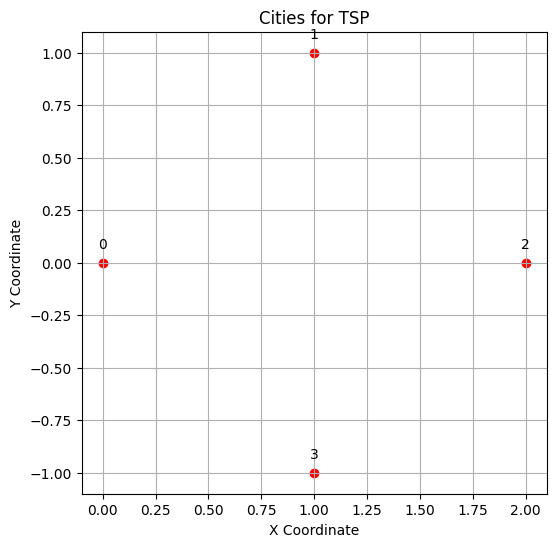

In [ ]:
import matplotlib.pyplot as plt

cities = [(0, 0), (1, 1), (2, 0), (1, -1)]

x_coords, y_coords = zip(*cities)

plt.figure(figsize=(6, 6))
plt.scatter(x_coords, y_coords, color="red")

for i, (x, y) in enumerate(cities):
    plt.annotate(f"{i}", (x, y), textcoords="offset points", xytext=(0,10), ha="center")

plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Cities for TSP")

plt.grid(True)
plt.show()

Antes de ler sobre a solução, como você modelaria os atributos do indivíduo para este problema?

### Solução

* Definimos a instância do problema usando as coordenadas das cidades.

* Definimos o cálculo da distância.

* Projetamos a função de avaliação que itera sobre as cidades e calcula suas distâncias.

* Definimos os indivíduos e os operadores genéticos. Aqui, nossos indivíduos são sequências de cidades.

* Rodamos o algoritmo genético.

In [ ]:
import random
import numpy as np
from deap import base, creator, tools, algorithms

cities = [(0, 0), (1, 1), (2, 0), (1, -1)]

def distance(city1, city2):
    return np.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

def evalTSP(individual):
    total_distance = sum(distance(cities[individual[i]], cities[individual[i + 1]]) for i in range(len(individual) - 1))
    total_distance += distance(cities[individual[-1]], cities[individual[0]])  # Return to start
    return (total_distance,)

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(len(cities)), len(cities))
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evalTSP)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

population = toolbox.population(n=50)

algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=100, verbose=False)

best_ind = tools.selBest(population, 1)[0]
best_route = [cities[i] for i in best_ind]

print(f"Best route is {best_route} with total distance {best_ind.fitness.values[0]}")

Best route is [(0, 0), (1, -1), (2, 0), (1, 1)] with total distance 5.656854249492381


# Exercícios
---

Abaixo você pode encontrar alguns exercícios para praticar o uso do framework.

## Exercício 1

No contexto dos exemplos acima, considere o seguinte:
* A aptidão é a soma dos atributos do indivíduo.
* Seus atributos são instanciados por `random.random()`.
* `random.random()` não retorna números negativos.

Como as médias de aptidão das gerações podem ser valores negativos?

In [ ]:
all([random.random() > 0 for i in range(10_000)])

True

## Exercício 2

Crie um algoritmo genético para resolver o seguinte problema:

Os indivíduos devem ser permutações dos números [0,1,2,3,4,5,6,7,8,9]. A função objetivo é contar quantos números estão na posição correta (ordem crescente).

In [ ]:
# função de avaliação
def avaliar_individuo(individuo):
    return (sum(1 for i, val in enumerate(individuo) if i == val),)

# definindo os componentes do algoritmo genético
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individuo", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(10), 10)
toolbox.register("individuo", tools.initIterate, creator.Individuo, toolbox.indices)
toolbox.register("populacao", tools.initRepeat, list, toolbox.individuo)
toolbox.register("evaluate", avaliar_individuo)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# parametros do algoritmo
populacao = toolbox.populacao(n=100)
prob_cruzamento = 0.7
prob_mutacao = 0.2
num_geracoes = 50

hof = tools.HallOfFame(1)  # Mantém apenas o melhor indivíduo
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", max)
logbook = tools.Logbook()

# executando o algoritmo
populacao, log = algorithms.eaSimple(populacao, toolbox, cxpb=prob_cruzamento, mutpb=prob_mutacao, ngen=num_geracoes, stats=stats, halloffame=hof, verbose=True)

# o melhor indivíduo, aptidão e geração
melhor_individuo = hof[0]
melhor_aptidao = melhor_individuo.fitness.values[0]
geracoes = log.select("gen")
aptidoes_maximas = log.select("max")
geracao_melhor_individuo = geracoes[np.argmax(aptidoes_maximas)]

print(f"Melhor indivíduo: {melhor_individuo}")
print(f"Melhor aptidão: {melhor_aptidao}")
print(f"Geração do melhor indivíduo: {geracao_melhor_individuo}")

gen	nevals	max   
0  	100   	(4.0,)
1  	70    	(5.0,)
2  	82    	(4.0,)
3  	83    	(5.0,)
4  	77    	(5.0,)
5  	71    	(5.0,)
6  	89    	(6.0,)
7  	79    	(6.0,)
8  	76    	(8.0,)
9  	70    	(7.0,)
10 	72    	(7.0,)
11 	64    	(8.0,)
12 	75    	(8.0,)
13 	78    	(8.0,)
14 	60    	(8.0,)
15 	76    	(8.0,)
16 	82    	(8.0,)
17 	80    	(8.0,)
18 	82    	(8.0,)
19 	87    	(10.0,)
20 	71    	(8.0,) 
21 	71    	(8.0,) 
22 	77    	(8.0,) 
23 	63    	(8.0,) 
24 	82    	(8.0,) 
25 	67    	(8.0,) 
26 	71    	(8.0,) 
27 	76    	(8.0,) 
28 	72    	(8.0,) 
29 	79    	(10.0,)
30 	82    	(10.0,)
31 	78    	(10.0,)
32 	77    	(10.0,)
33 	77    	(10.0,)
34 	75    	(10.0,)
35 	76    	(10.0,)
36 	74    	(10.0,)
37 	69    	(10.0,)
38 	79    	(10.0,)
39 	69    	(10.0,)
40 	68    	(10.0,)
41 	76    	(10.0,)
42 	72    	(10.0,)
43 	71    	(10.0,)
44 	77    	(10.0,)
45 	76    	(10.0,)
46 	76    	(10.0,)
47 	76    	(10.0,)
48 	83    	(10.0,)
49 	76    	(10.0,)
50 	74    	(10.0,)
Melhor indivíduo: [0, 1, 2, 3, 4

## Exercício 3

Crie um algoritmo genético para resolver o seguinte problema:

Maximize a função `𝑓(𝑥,𝑦) = 𝑥 ⋅ 𝑦`, onde `x` e `y` são números de ponto flutuante no intervalo [0, 10].

Use diferentes operadores genéticos (seleção, crossover, mutação) dos utilizados nos exercícios anteriores.

In [ ]:
def avaliar_individuo(individuo):
    x, y = individuo
    return (x * y,)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individuo", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, 0, 10)
toolbox.register("individuo", tools.initCycle, creator.Individuo, (toolbox.attr_float, toolbox.attr_float), n=1)
toolbox.register("populacao", tools.initRepeat, list, toolbox.individuo)
toolbox.register("evaluate", avaliar_individuo)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selRoulette)

populacao = toolbox.populacao(n=100)
prob_cruzamento = 0.7
prob_mutacao = 0.2
num_geracoes = 50

hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max)
logbook = tools.Logbook()
logbook.header = "gen", "max"

populacao, log = algorithms.eaSimple(populacao, toolbox, cxpb=prob_cruzamento, mutpb=prob_mutacao, ngen=num_geracoes, stats=stats, halloffame=hof, verbose=True)

melhor_individuo = hof[0]
melhor_aptidao = melhor_individuo.fitness.values[0]
geracoes = log.select("gen")
aptidoes_maximas = log.select("max")
geracao_melhor_individuo = geracoes[np.argmax(aptidoes_maximas)]

print(f"Melhor indivíduo: {melhor_individuo}")
print(f"Melhor aptidão: {melhor_aptidao}")
print(f"Geração do melhor indivíduo: {geracao_melhor_individuo}")

gen	nevals	max    
0  	100   	73.4781
1  	73    	82.6426
2  	76    	87.5984
3  	64    	92.6741
4  	77    	113.965
5  	69    	141.78 
6  	79    	155.467
7  	78    	145.647
8  	73    	134.39 
9  	77    	175.948
10 	78    	287.95 
11 	85    	290.843
12 	61    	354.125
13 	82    	386.367
14 	79    	386.367
15 	75    	411.258
16 	74    	411.258
17 	80    	458.784
18 	79    	475.178
19 	77    	556.048
20 	74    	499.84 
21 	73    	558.332
22 	74    	616.069
23 	72    	616.069
24 	72    	693.954
25 	80    	693.954
26 	74    	870.552
27 	73    	721.843
28 	78    	694.688
29 	75    	760.221
30 	85    	766.947
31 	82    	908.609
32 	84    	989.223
33 	78    	1060.68
34 	78    	1196.39
35 	75    	1387.07
36 	84    	1683.48
37 	76    	1820.65
38 	80    	2377.78
39 	82    	2436.66
40 	85    	2467.03
41 	76    	3629.32
42 	81    	4025.04
43 	78    	4582.17
44 	78    	4595.2 
45 	71    	4833.06
46 	72    	5449.03
47 	67    	5449.03
48 	82    	5250.59
49 	82    	5441.47
50 	71    	6656.75
Melhor indiv

## Exercício 4

Crie um algoritmo genético multi-objetivo para resolver o seguinte problema:

Os indivíduos devem ser uma lista de `20` números de ponto flutuante no intervalo `[0,1]`.

Minimize a soma dos índices pares enquanto maximiza a soma dos índices ímpares nesta lista. Minimizar os índices pares é duas vezes mais importante do que minimizar os índices ímpares.

Use diferentes operadores genéticos (seleção, crossover, mutação) dos utilizados nos exercícios anteriores.

In [ ]:
def avaliar_individuo(individuo):
    soma_pares = sum(individuo[i] for i in range(0, len(individuo), 2))
    soma_impares = sum(individuo[i] for i in range(1, len(individuo), 2))
    return (soma_pares, -soma_impares)

creator.create("FitnessMulti", base.Fitness, weights=(-2.0, 1.0))
creator.create("Individuo", list, fitness=creator.FitnessMulti)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, 0, 1)
toolbox.register("individuo", tools.initRepeat, creator.Individuo, toolbox.attr_float, n=20)
toolbox.register("populacao", tools.initRepeat, list, toolbox.individuo)
toolbox.register("evaluate", avaliar_individuo)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selNSGA2)

populacao = toolbox.populacao(n=100)
prob_cruzamento = 0.7
prob_mutacao = 0.2
num_geracoes = 50

hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max)
logbook = tools.Logbook()
logbook.header = "gen", "max"

populacao, log = algorithms.eaMuPlusLambda(populacao, toolbox, mu=100, lambda_=200, cxpb=prob_cruzamento, mutpb=prob_mutacao, ngen=num_geracoes, stats=stats, halloffame=hof, verbose=True)

melhor_individuo = hof[0]
melhor_aptidao = melhor_individuo.fitness.values[0]
geracoes = log.select("gen")
aptidoes_maximas = log.select("max")
geracao_melhor_individuo = geracoes[np.argmax(aptidoes_maximas)]

print(f"Melhor indivíduo: {melhor_individuo}")
print(f"Melhor aptidão: {melhor_aptidao}")
print(f"Geração do melhor indivíduo: {geracao_melhor_individuo}")

gen	nevals	max    
0  	100   	7.37968
1  	180   	9.0622 
2  	181   	9.9813 
3  	179   	11.7308
4  	175   	11.7308
5  	180   	8.69468
6  	179   	13.7485
7  	168   	15.8105
8  	175   	15.8105
9  	177   	18.8429
10 	175   	25.9507
11 	182   	32.7893
12 	177   	36.7568
13 	175   	41.2723
14 	184   	46.9788
15 	175   	52.7638
16 	180   	55.0301
17 	178   	59.8213
18 	181   	73.1698
19 	183   	84.2106
20 	178   	84.5201
21 	180   	104.384
22 	171   	124.975
23 	177   	124.975
24 	179   	151.234
25 	181   	159.892
26 	178   	166.807
27 	185   	213.415
28 	172   	232.777
29 	179   	249.079
30 	176   	258.036
31 	173   	316.907
32 	184   	316.907
33 	181   	353.611
34 	180   	391.993
35 	173   	487.66 
36 	182   	494.377
37 	181   	543.834
38 	175   	610.23 
39 	173   	630.91 
40 	180   	688.503
41 	186   	688.503
42 	180   	691.034
43 	182   	772.377
44 	175   	826.043
45 	185   	851.978
46 	178   	1142.44
47 	184   	1142.44
48 	178   	1142.44
49 	180   	1303.34
50 	180   	1479.65
Melhor indiv

## Exercício 5

Escolha uma das implementações anteriores do algoritmo genético, registre a aptidão média ao longo das gerações e plote em um gráfico.

gen	nevals	media    	max    
0  	100   	0.0485539	7.23252
1  	77    	0.00533752	8.05918
2  	78    	0.000222256	9.42944
3  	73    	-0.0422816 	9.42944
4  	73    	-0.0924204 	9.40343
5  	85    	-0.119305  	10.7253
6  	71    	-0.107113  	10.7253
7  	70    	-0.192233  	12.3904
8  	76    	-0.229624  	13.1976
9  	78    	-0.323511  	14.5489
10 	78    	-0.349555  	13.8866
11 	71    	-0.31232   	15.0873
12 	80    	-0.339247  	17.7693
13 	82    	-0.382151  	14.6411
14 	81    	-0.404892  	17.1423
15 	71    	-0.350328  	22.0672
16 	83    	-0.28276   	25.7903
17 	80    	-0.256435  	23.9446
18 	81    	-0.226928  	20.2693
19 	77    	-0.254735  	20.4343
20 	66    	-0.356418  	28.0371
21 	78    	-0.386797  	29.2584
22 	81    	-0.345952  	20.7544
23 	77    	-0.447765  	28.7523
24 	77    	-0.508064  	28.7523
25 	66    	-0.501941  	28.8037
26 	65    	-0.534132  	35.0688
27 	81    	-0.588803  	35.053 
28 	76    	-0.689154  	35.3945
29 	83    	-0.692347  	35.3945
30 	71    	-0.661431  	37.7146
31 	79    	-0

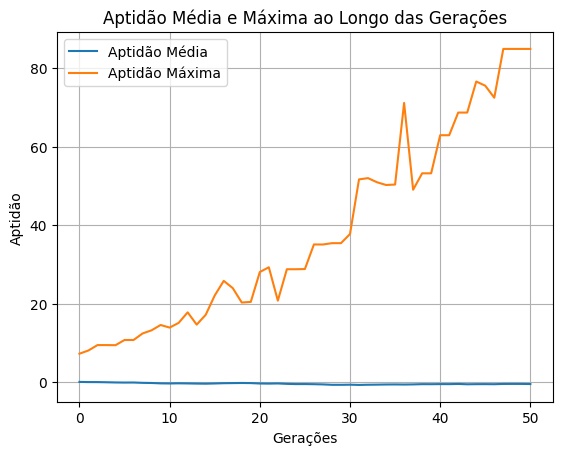

In [ ]:
import matplotlib.pyplot as plt

# usando o exercicio 3 como exemplo
# registrando estatisticas
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("media", np.mean)
stats.register("max", np.max)
logbook = tools.Logbook()
logbook.header = "gen", "media", "max"


# executando o algoritmo genetico com registro de estatisticas
populacao = toolbox.populacao(n=100)
populacao, log = algorithms.eaSimple(populacao, toolbox, cxpb=prob_cruzamento, mutpb=prob_mutacao, ngen=num_geracoes, stats=stats, halloffame=hof, verbose=True)

# valores de aptidao media das geracoes
media_aptidao = log.select("media")
max_aptidao = log.select("max")

# plotando o grafico de aptidao media ao longo das geracoes
plt.plot(media_aptidao, label="Aptidão Média")
plt.plot(max_aptidao, label="Aptidão Máxima")
plt.xlabel("Gerações")
plt.ylabel("Aptidão")
plt.title("Aptidão Média e Máxima ao Longo das Gerações")
plt.legend()
plt.grid(True)
plt.show()